<a href="https://colab.research.google.com/github/andreggalvao/Bootcamp_Arq_ML_XPE_2023_3A/blob/main/Semana_1/exercicios_1_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Importações padrões
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importações de classe Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.utils import to_categorical

# Importando os dados
from keras.datasets import fashion_mnist, mnist

# Importando ferramentas
from sklearn.model_selection import KFold, RandomizedSearchCV
import tensorflow as tf


In [2]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Vamos agora tratar os códigos para usar no novo modelo.

Com os dados já limpos vamos realizar o desenvolvimento de um modelo base: 
1. Carregando os dados e preparação dos dados
3. Definindo o modelo
4. Medindo o modelo
5. Apresentação de resultados

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


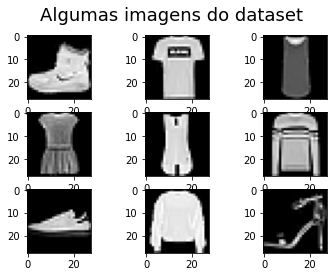

In [4]:

# #Vendo as imagens
plt.suptitle("Algumas imagens do dataset", fontsize = 18)
c = 1
for i in range(9):
 plt.subplot(3, 3, c)
 plt.imshow(X_train[i], cmap='gray')
 c = c + 1
plt.show()

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Estabelecendo as funções para organizar o código

In [7]:
def carregamento_dados():
  
# carregando os dados
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Transformar dados X em array e float
    X_train = X_train.reshape(X_train.shape[0],784 ).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

# Normaliza os dados em X
    X_train = X_train / 255
    X_test = X_test / 255

# Transformar dados y em array
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train, y_train, X_test, y_test



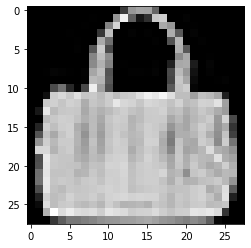

# Trabalhando com o VGG

A VGG16 inicialmente foi treinada para imagens coloridas. Portanto, é necessário que ela receba imagens com canais de cor. Ou seja, cada pixel da imagem será representado por mais de um valor. Tipicamente, utilizamos o sistema de cor RGB, ou seja, cada pixel da imagem é composto por três valores. Podemos dizer, portanto, que uma imagem de 32 pixels de largura e 32 pixels de altura no sistema RGB tem uma dimensionalidade de 32x32x3.

Como as imagens do Fashion MNIST são em tons de cinza (ou seja, só possuem um canal de cor e, portanto, cada imagem tem o tamanho 28x28x1), é necessário redimensionar as imagens do dataset para 32x32x3, adicionando outros dois canais para usar o VGG16. 



In [9]:
modelo_vgg = VGG16()

553467096/553467096 [==============================] - 14s 0us/step


In [10]:
modelo_vgg.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     